<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/mid_term_bitlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git


fatal: destination path 'bitlabs-project' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import IsolationForest
df = pd.read_csv('/content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv')


DATA CLEANING

In [4]:
#inkonsisten

# Memeriksa nilai unik di kolom teks tertentu untuk melihat inkonsistensi
for col in df.select_dtypes(include='object'):
    print(f"Unique values in {col}: {df[col].unique()[:5]}")  # Tampilkan hanya 5 pertama



Unique values in hotel: ['Resort Hotel' 'City Hotel']
Unique values in arrival_date_month: ['July' 'August' 'September' 'October' 'November']
Unique values in meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in country: ['GBR' 'PRT' 'USA' 'IRL' 'FRA']
Unique values in market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary']
Unique values in distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in reserved_room_type: ['A' 'C' 'D' 'E' 'G']
Unique values in assigned_room_type: ['C' 'A' 'D' 'E' 'G']
Unique values in deposit_type: ['No Deposit' 'Non Refund' 'Refundable']
Unique values in customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in reservation_status: ['Check-Out' 'Canceled' 'No-Show']
Unique values in reservation_status_date: ['2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22' '2015-06-23']
Unique values in name: ['Rebecca Parker' 'Laura Murray' 'Linda Hines' 'Jasmine Fletcher'
 'Dylan Rang

In [5]:
# Missing Values

# Mengganti NaN dengan median untuk semua kolom numerik
numeric_df = df.select_dtypes(include=['number']) # Seleksi kolom numerik saja
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median()) # Isi NaN pada kolom numerik dengan median

# Mengganti NaN di kolom kategorikal dengan "unknown"
categorical_df = df.select_dtypes(include=['object'])  # Seleksi kolom kategorikal
df[categorical_df.columns] = df[categorical_df.columns].fillna('unknown')  # Isi NaN pada kolom kategorikal dengan 'unknown'

# Memeriksa jumlah NaN setelah penggantian
print(f"Jumlah NaN setelah penggantian: {df.isnull().sum().sum()}")

# Menyimpan dataset yang telah dibersihkan kembali ke Google Drive
df.to_csv('/content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv', index=False)



Jumlah NaN setelah penggantian: 0


In [16]:
#Mengecek Jumlah Duplikasi Dalam DataSet
num_duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi: {num_duplicates}")


Jumlah duplikasi: 0


In [8]:
#Memeriksaa Anomali Dalam Dataset

# Menggunakan Isolation Forest pada semua kolom numerik dalam dataset
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df.select_dtypes(include=[np.number]))

# Anomali diberi label -1 oleh Isolation Forest
df['anomaly'] = df['anomaly'] == -1

print(df)

       Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0               2  Resort Hotel            0        7.0               2015   
1               3  Resort Hotel            0       13.0               2015   
2               4  Resort Hotel            0       69.0               2015   
3               5  Resort Hotel            0       14.0               2015   
4               6  Resort Hotel            0       69.0               2015   
...           ...           ...          ...        ...                ...   
96701      119385    City Hotel            0       23.0               2017   
96702      119386    City Hotel            0       69.0               2017   
96703      119387    City Hotel            0       69.0               2017   
96704      119388    City Hotel            0      109.0               2017   
96705      119389    City Hotel            0      205.0               2017   

      arrival_date_month  arrival_date_week_number  arrival_dat

In [9]:
# Memeriksa Anomali Di Date Time
# Mengonversi kolom datetime menjadi format timestamp
df['timestamp'] = pd.to_datetime(df['arrival_date_day_of_month']).astype(np.int64) // 10**9

# Menggunakan Isolation Forest pada semua kolom numerik dalam dataset, termasuk timestamp
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df.select_dtypes(include=[np.number]))

# Anomali diberi label -1 oleh Isolation Forest
df['anomaly'] = df['anomaly'] == -1

print(df)

       Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0               2  Resort Hotel            0        7.0               2015   
1               3  Resort Hotel            0       13.0               2015   
2               4  Resort Hotel            0       69.0               2015   
3               5  Resort Hotel            0       14.0               2015   
4               6  Resort Hotel            0       69.0               2015   
...           ...           ...          ...        ...                ...   
96701      119385    City Hotel            0       23.0               2017   
96702      119386    City Hotel            0       69.0               2017   
96703      119387    City Hotel            0       69.0               2017   
96704      119388    City Hotel            0      109.0               2017   
96705      119389    City Hotel            0      205.0               2017   

      arrival_date_month  arrival_date_week_number  arrival_dat

In [10]:
# Menghapus baris yang terdeteksi sebagai anomali
df.drop(df[df['anomaly'] == True].index, inplace=True)

# Menghapus baris yang terdeteksi sebagai anomali dan melakukan reindexing
df = df.drop(df[df['anomaly'] == True].index).reset_index(drop=True)

print(df.drop)

# Menyimpan dataset yang telah dibersihkan kembali ke Google Drive
df.to_csv('/content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv', index=False)

print(f"Dataset yang sudah dibersihkan disimpan di: /content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv")

<bound method DataFrame.drop of        Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0               2  Resort Hotel            0        7.0               2015   
1               4  Resort Hotel            0       69.0               2015   
2               5  Resort Hotel            0       14.0               2015   
3               6  Resort Hotel            0       69.0               2015   
4               7  Resort Hotel            0        9.0               2015   
...           ...           ...          ...        ...                ...   
87030      119383    City Hotel            0       69.0               2017   
87031      119386    City Hotel            0       69.0               2017   
87032      119387    City Hotel            0       69.0               2017   
87033      119388    City Hotel            0      109.0               2017   
87034      119389    City Hotel            0      205.0               2017   

      arrival_date_month  arriv

exploratory data analysis Python

In [11]:
#4.1
# Filter data dengan is_canceled == 1
df_canceled = df[df['is_canceled'] == 1]

# Hitung total lead_time dan jumlah data yang dibatalkan
total_lead_time = df_canceled['lead_time'].sum()
total_canceled = len(df_canceled)

# Hitung rasio
if total_canceled > 0:
    rasio = total_lead_time / total_canceled
else:
    rasio = 0

print(f"Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: {rasio}")


Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: 110.1391005004303


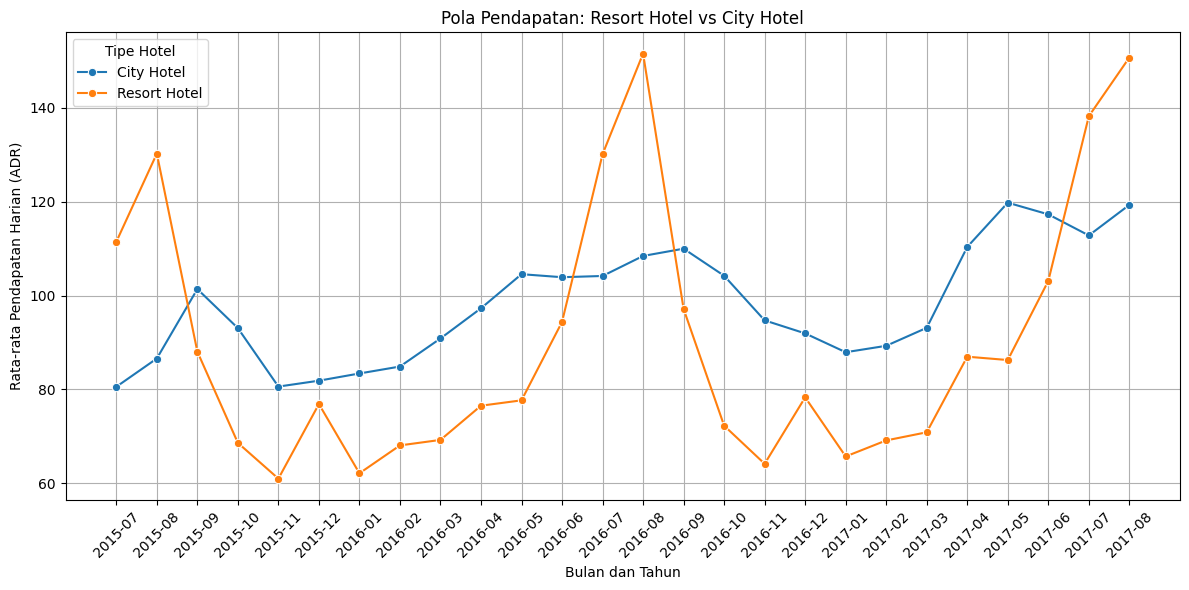

In [24]:


# Mengonversi kolom bulan/tahun menjadi format datetime
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-01'
)

# Mengelompokkan ADR (pendapatan harian rata-rata) berdasarkan hotel dan bulan
monthly_adr = (
    df.groupby(['hotel', df['arrival_date'].dt.to_period('M')])['adr']
    .mean()
    .reset_index()
)

# Mengonversi kembali kolom periode menjadi string untuk keperluan plotting
monthly_adr['arrival_date'] = monthly_adr['arrival_date'].astype(str)

# Membuat plot pola pendapatan Resort Hotel vs City Hotel
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='arrival_date', y='adr', hue='hotel',
    data=monthly_adr, marker='o'
)

# Menambahkan label dan judul pada plot
plt.title('Pola Pendapatan: Resort Hotel vs City Hotel')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Rata-rata Pendapatan Harian (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tipe Hotel')

# Menyempurnakan tampilan plot
plt.tight_layout()
plt.show()

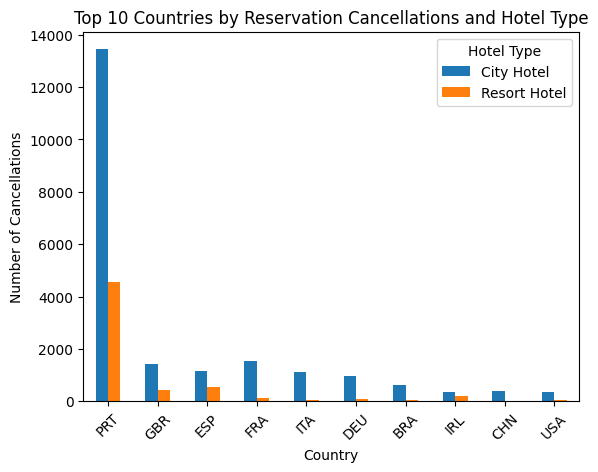

In [13]:
# soal 4.3
# Filter data untuk pembatalan
canceled_data = df[df['is_canceled'] == 1]

# Menghitung jumlah pembatalan per negara dan hotel
cancel_counts = canceled_data.groupby(['country', 'hotel']).size().unstack().fillna(0)

# Mengambil 10 negara dengan pembatalan tertinggi
top_countries = cancel_counts.sum(axis=1).nlargest(10).index
top_cancel_counts = cancel_counts.loc[top_countries]

# Plot data dalam bentuk stacked bar chart
top_cancel_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
plt.title("Top 10 Countries by Reservation Cancellations and Hotel Type")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.legend(title="Hotel Type")
plt.xticks(rotation=45)
plt.show()


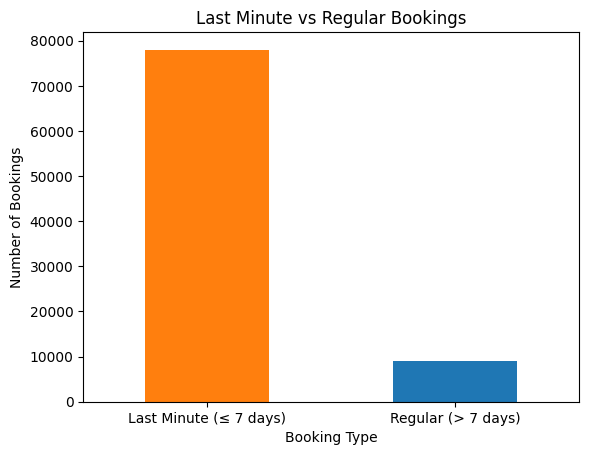

In [14]:
#4.4
# Definisikan last minute booking sebagai lead_time <= 7 hari
df['is_last_minute'] = df['lead_time'] <= 7

# Hitung jumlah pemesanan last minute dan non-last minute
last_minute_counts = df['is_last_minute'].value_counts()

# Mengatur Label dan Membuat Grafik Batang (Bar Chart)
last_minute_counts.index = ['Last Minute (≤ 7 days)', 'Regular (> 7 days)']
last_minute_counts.plot(kind='bar', color=['#ff7f0e', '#1f77b4'])

# Menambahkan Detail dan Menampilkan Grafik
plt.title("Last Minute vs Regular Bookings")
plt.xlabel("Booking Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

A/B TESTING PYTHON

In [15]:
#A/B TESTING

# Pisahkan data menjadi dua grup berdasarkan jenis hotel
city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr']

# 1. Uji normalitas dengan Kolmogorov-Smirnov
city_normal_ks = stats.kstest(city_hotel_adr, 'norm').pvalue > 0.05
resort_normal_ks = stats.kstest(resort_hotel_adr, 'norm').pvalue > 0.05

# 2. Memilih uji statistik berdasarkan hasil uji normalitas
if city_normal_ks and resort_normal_ks:
    # Jika data berdistribusi normal, gunakan t-test
    t_stat, p_value = stats.ttest_ind(city_hotel_adr, resort_hotel_adr)
    test_used = "t-test"
else:
    # Jika data tidak normal, gunakan Mann-Whitney U test
    t_stat, p_value = stats.mannwhitneyu(city_hotel_adr, resort_hotel_adr)
    test_used = "Mann-Whitney U test"

# 3. Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Tolak H0: Ada perbedaan rata-rata adr antara City Hotel dan Resort Hotel.")
else:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Gagal menolak H0: Tidak ada perbedaan rata-rata adr yang signifikan antara City Hotel dan Resort Hotel.")

Hasil Mann-Whitney U test menunjukkan p-value = 0.0000. Tolak H0: Ada perbedaan rata-rata adr antara City Hotel dan Resort Hotel.
